![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

### Import, investigate and pre-process the "penguins.csv" dataset.

In [33]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [34]:
print(penguins_df.isna().sum())

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


### Perform preprocessing steps on the dataset to create dummy variables

In [35]:
penguins_df = pd.get_dummies(penguins_df, dtype='int')

scaler = StandardScaler()
scaled_df = scaler.fit_transform(penguins_df)

preprocessed_df = pd.DataFrame(data=scaled_df, columns=penguins_df.columns)
preprocessed_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994


### Detect the optimal number of clusters for k-means clustering using the "Elbow Method"

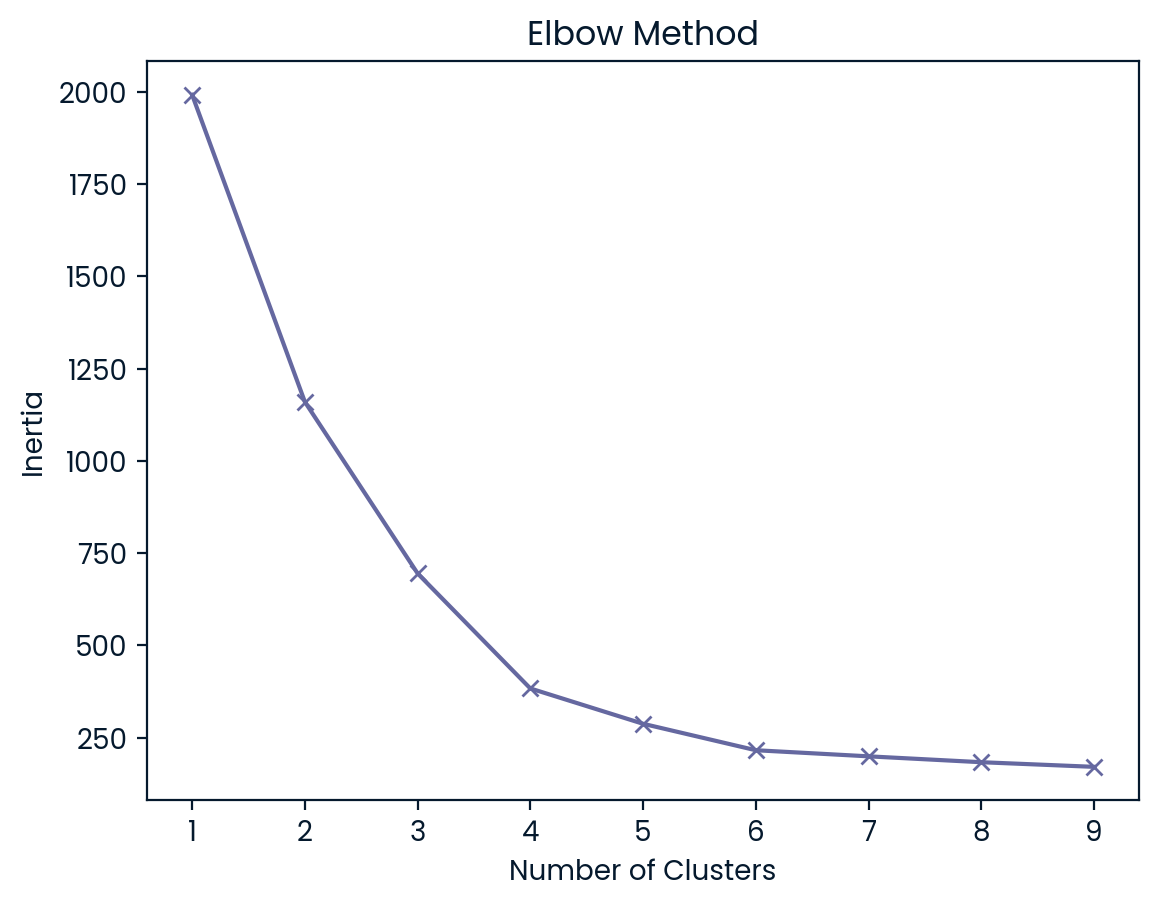

In [36]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(preprocessed_df)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 10), inertia, marker='x')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

### Run the K-Means Algorithm for the optimal number of clusters

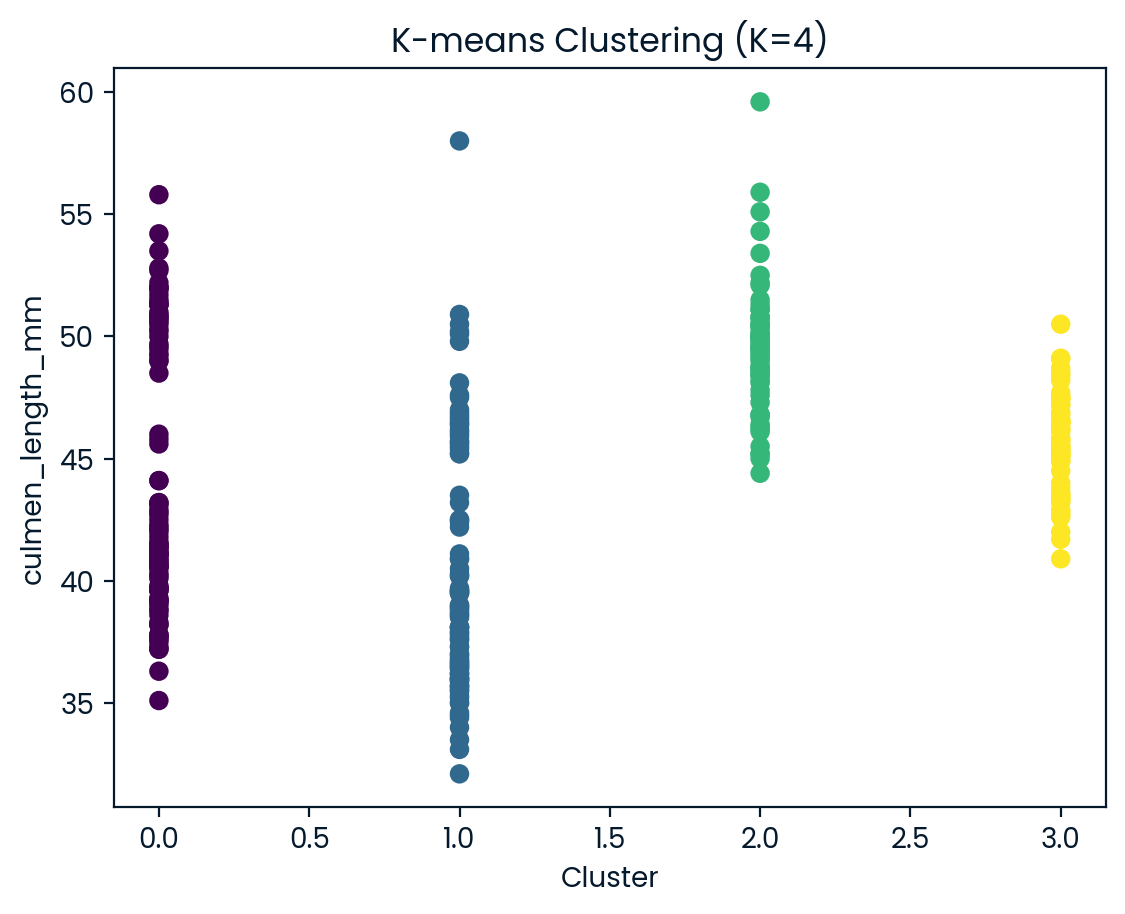

In [37]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(preprocessed_df)

plt.scatter(kmeans.labels_, penguins_df['culmen_length_mm'], c=kmeans.labels_)
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

### Create a final statistical DataFrame for each cluster, containing one row per cluster that shows the mean of the original variables by cluster.

In [38]:
# Step - create final `stat_penguins` DataFrame
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']
stat_penguins = penguins_df[numeric_columns].groupby(kmeans.labels_).mean()
stat_penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,49.473770,15.718033,221.540984
3,45.563793,14.237931,212.706897
